In this projet I am going to analyze the data of Kaffles's dataset [Forest Fires in Brazil](https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil).

## Importing the data

We are work with two tables, one with the number of Fire hotspot and other with the rainfall precipitation.

In [2]:
#| output: false

# Import libriries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime


# Load Dataset
fire_df = pd.read_csv('data/amazon.csv', encoding = 'Latin-1')
precitation_df = pd.read_csv('data/precipitation.csv')

## First Look at the data


 Befores the analysis first let take a look at the data struct to see if is possible to merge the datasets.

### Fire hotspot database

- Taking a look at the first 5 rows.

In [3]:
fire_df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Column data types

In [4]:
fire_df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

- Dataset shape

In [5]:
fire_df.shape

(6454, 5)

After look at the data we can observe that we will need some data transformation. First verify if the name of states are correct, than transform the date column to the apropriate type and after that we could standardize the Month and Year columns.

### Rainfall precipitation database

- First five rows

In [6]:
precitation_df.head()

,state,date,precipitation
0,BA,31/01/1998,63.6
1,BA,28/02/1998,55.6
2,BA,31/03/1998,117.2
3,BA,30/04/1998,206.0
4,BA,31/05/1998,250.9


- Columns data types

In [7]:
precitation_df.dtypes

state             object
date              object
precipitation    float64
dtype: object

- Dataset shape

In [8]:
precitation_df.shape

(5814, 3)

The state column is in a different format, we will have to standardize the values between the two tables. The date column also follows a different pattern, we will have to aggregate by month, year and state to be able to join the two tables.

## Data Transformation


### Fire hotspot database

In [9]:
fire_df.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [10]:
# Dictionary with month translations
month_map={'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4, 'Maio': 5,
          'Junho': 6, 'Julho': 7, 'Agosto': 8, 'Setembro': 9, 'Outubro': 10,
          'Novembro': 11, 'Dezembro': 12}
#mapping months
fire_df['month']=fire_df['month'].map(month_map)

In [11]:
sorted(fire_df.month.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

First we will work with the state column, to standardize the values we will use a dictionary to map the correct values. fist let's see the unique state values.

In [12]:
sorted(fire_df.state.unique())

['Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Minas Gerais',
 'Paraiba',
 'Pará',
 'Pernambuco',
 'Piau',
 'Rio',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins']

Now we will use the dictionary to map the correct values

In [13]:
# Dictionary with correct state name
state_map={'Acre':'Acre',
           'Alagoas':'Alagoas',
           'Amapa':'Amapá',
           'Amazonas':'Amazonas',
           'Bahia':'Bahia',
           'Ceara':'Ceará',
           'Distrito Federal':'Distrito Federal',
           'Espirito Santo':'Espírito Santo',
           'Goias':'Goiás',
           'Maranhao':'Maranhão',
           'Mato Grosso':'Mato Grosso',
           'Minas Gerais':'Minas Gerais',
           'Paraiba':'Paraíba',
           'Pará':'Pará',
           'Pernambuco':'Pernambuco',
           'Piau':'Piauí',
           'Rio':'Rio de Janeiro',
           'Rondonia': 'Rondônia',
           'Roraima':'Roraima',
           'Santa Catarina':'Santa Catarina',
           'Sao Paulo':'São Paulo',
           'Sergipe': 'Sergipe',
           'Tocantins': 'Tocantins'
           }

#mapping state
fire_df['state']=fire_df['state'].map(state_map)

With the corrected values let's plot to see how it turned out.

sorted(fire_df.state.unique())

Now we will change the date column to the correct type. As the data has unique values for each set of state, month and year we will transform the column to date type, then extract the month and year and overwrite the corresponding columns.

In [14]:
#| output: false

# Delete date column from dataset
fire_df.pop("date")

fire_df['month'] = fire_df['month'].astype(str)
fire_df['year'] = fire_df['year'].astype(str)

# Change Order Coumns in dataset
fire_df.insert(0, 'state', fire_df.pop('state'))

Let's check how it looks after the change

In [15]:
fire_df.head()

,state,year,month,number
0,Acre,1998,1,0.0
1,Acre,1999,1,0.0
2,Acre,2000,1,0.0
3,Acre,2001,1,0.0
4,Acre,2002,1,0.0


### Rainfall precipitation Database

For the rainfall precipitation database, we will use the same technique used in the previous table to standardize the values of the states. First we'll take a look to see the unique values of the states.

In [16]:
precitation_df.state.unique()

array(['BA', 'RR', 'SE', 'AL', 'TO', 'GO', 'PI', 'MG', 'PR', 'MA', 'AP',
       'RJ', 'AC', 'AM', 'DF', 'PE', 'CE', 'PA', 'MT', 'PB', 'RS', 'RN',
       'SP', 'ES', 'SC'], dtype=object)

Now we will use a dictionary to get the correct values in the state column


In [17]:
states = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

#mapping our translated months
precitation_df['state'] = precitation_df['state'].map(states)
#checking the state column for the second time after the changes were made
precitation_df.state.unique()


array(['Bahia', 'Roraima', 'Sergipe', 'Alagoas', 'Tocantins', 'Goiás',
       'Piauí', 'Minas Gerais', 'Paraná', 'Maranhão', 'Amapá',
       'Rio de Janeiro', 'Acre', 'Amazonas', 'Distrito Federal',
       'Pernambuco', 'Ceará', 'Pará', 'Mato Grosso', 'Paraíba',
       'Rio Grande do Sul', 'Rio Grande do Norte', 'São Paulo',
       'Espírito Santo', 'Santa Catarina'], dtype=object)

Then we will transform the date column to the correct type, extract the month and year and then group the precipitation values by state, month and year.

In [18]:
#| output: false

#Cast the date column to date type
precitation_df['date'] = pd.to_datetime(pd.Series(precitation_df.date), format='%d/%m/%Y')

# Create a Column with Year
precitation_df['year'] =  pd.DatetimeIndex(precitation_df['date']).year
precitation_df['year'] = precitation_df['year'].astype(str)
# Create a Column with Month
precitation_df['month'] =  pd.DatetimeIndex(precitation_df['date']).month
precitation_df['month'] = precitation_df['month'].astype(str)


# Delete date column from dataset
precitation_df.pop("date")

# Change Order Coumns in dataset
precitation_df.insert(0, 'state', precitation_df.pop('state'))

# Agregate Precipitation by state, year and month
precitation_df = precitation_df.groupby(['state', 'year', 'month']).sum().reset_index()

let's check how the data was after the change

In [19]:
precitation_df.head()

,state,year,month,precipitation
0,Acre,1998,1,335.5
1,Acre,1998,10,265.6
2,Acre,1998,11,304.8
3,Acre,1998,12,404.2
4,Acre,1998,2,299.4


After having transformed the two tables, we can now perform the join of the databases in a single table.

In [20]:
df = pd.merge(fire_df, precitation_df, how = "left", on=["state", "year", "month"])


Let's check the structure of our final table.


In [21]:
df.head()


,state,year,month,number,precipitation
0,Acre,1998,1,0.0,335.5
1,Acre,1999,1,0.0,463.6
2,Acre,2000,1,0.0,188.8
3,Acre,2001,1,0.0,317.2
4,Acre,2002,1,0.0,217.3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          6454 non-null   object 
 1   year           6454 non-null   object 
 2   month          6454 non-null   object 
 3   number         6454 non-null   float64
 4   precipitation  5941 non-null   float64
dtypes: float64(2), object(3)
memory usage: 302.5+ KB


In [23]:
df.isna().sum()

state              0
year               0
month              0
number             0
precipitation    513
dtype: int64

## EDA

### Fire hotspot

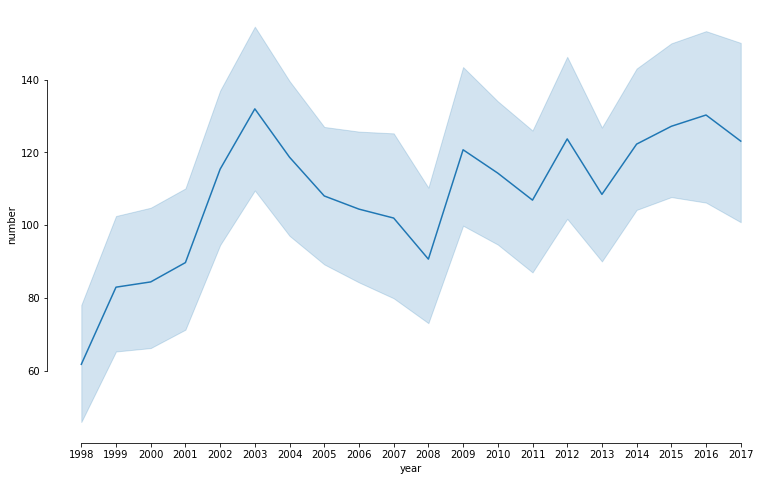

In [24]:
#| column: page
#| fig-align: center
plt.figure(figsize=(13,8))
sns.lineplot(x="year", y="number",
            palette=["m", "g"],
            data=df)
sns.despine(offset=1, trim=True)

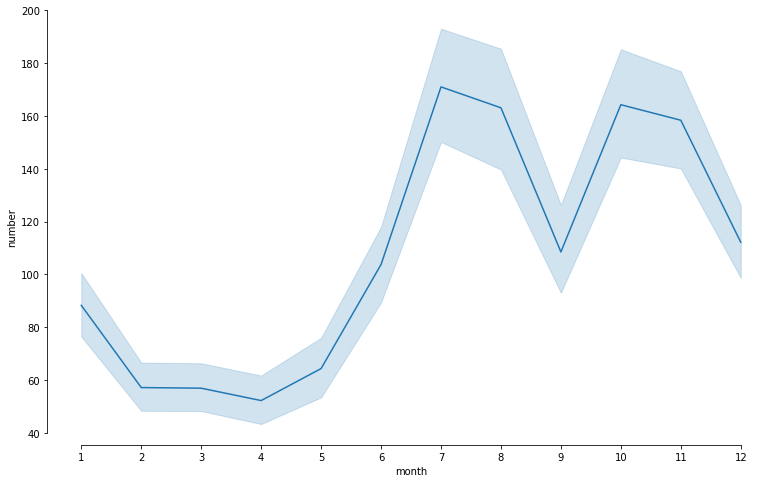

In [25]:
#| column: page
#| fig-align: center
plt.figure(figsize=(13,8))
ax = sns.lineplot(x="month", y="number",
          palette=["m", "g"],
            data=df)
sns.despine(offset=1, trim=True)

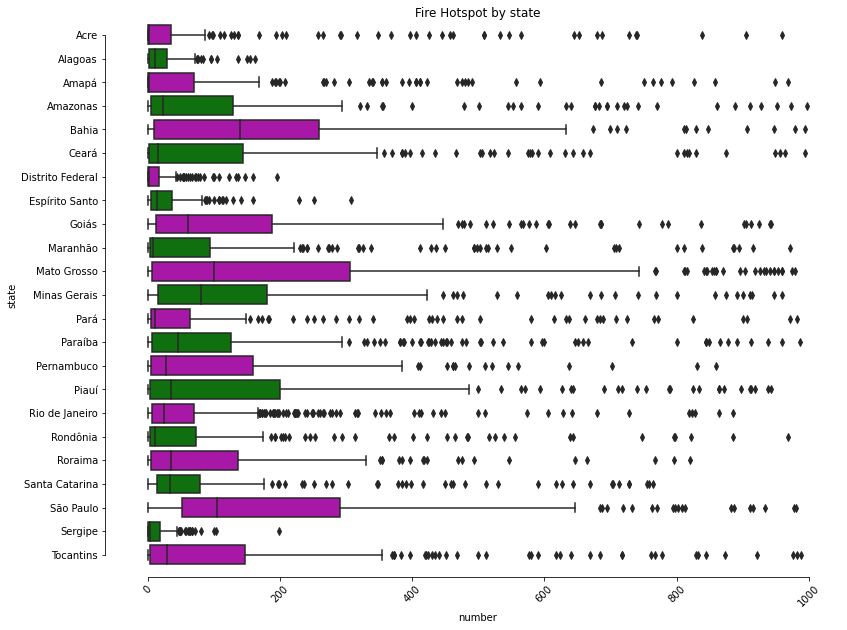

In [26]:
#| fig-column: page
#| fig-align: center


plt.figure(figsize=(13,10))
ax = sns.boxplot(y="state", x="number", orient='h',
                 palette=["m", "g"], data=df)
ax.set_title("Fire Hotspot by state")
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.show()

### Rainfall precipitation

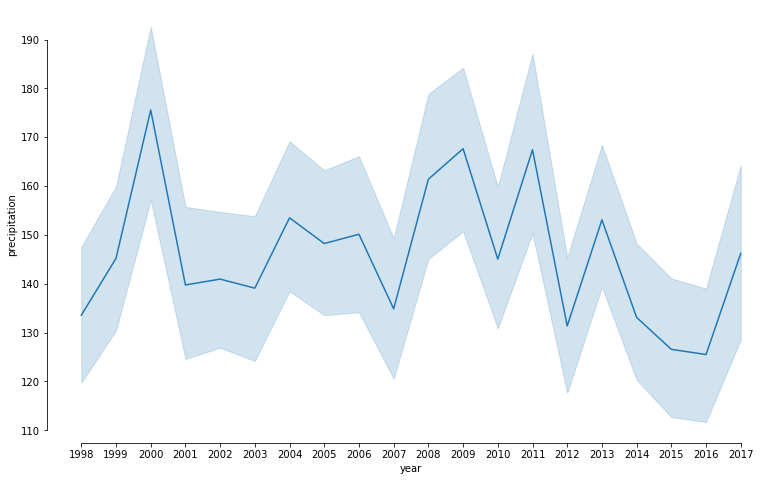

In [27]:
#| column: page
#| fig-align: center
plt.figure(figsize=(13,8))
sns.lineplot(x="year", y="precipitation",
            palette=["m", "g"],
            data=df)
sns.despine(offset=1, trim=True)

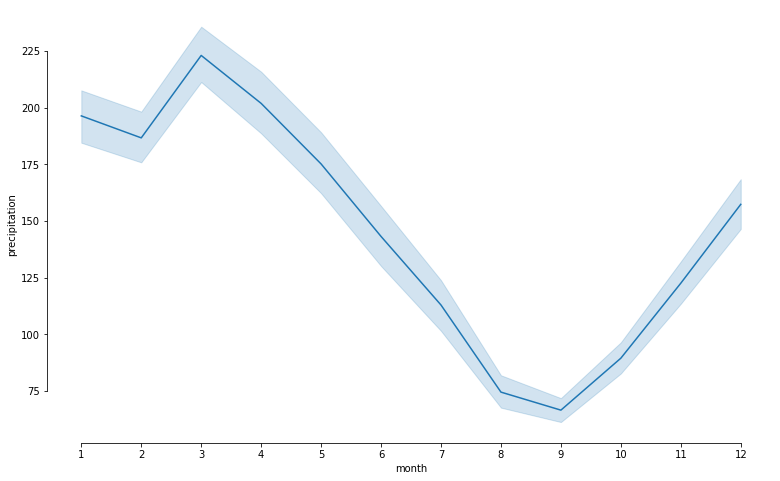

In [28]:
#| column: page
#| fig-align: center
plt.figure(figsize=(13,8))
ax = sns.lineplot(x="month", y="precipitation",
          palette=["m", "g"],
            data=df)
sns.despine(offset=1, trim=True)

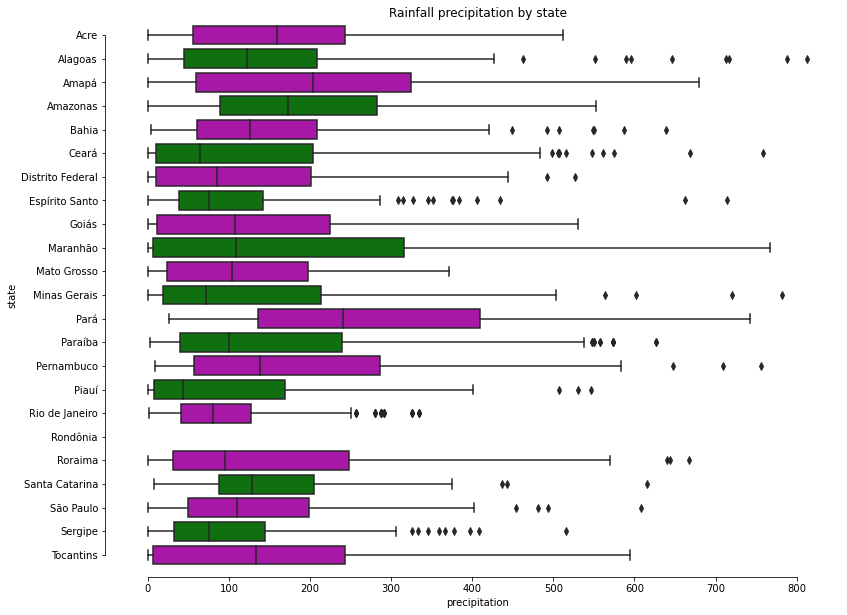

In [29]:
#| fig-column: page
#| fig-align: center
plt.figure(figsize=(13,10))
ax = sns.boxplot(x="precipitation", y="state",
          palette=["m", "g"],
            data=df)
ax.set_title("Rainfall precipitation by state")
sns.despine(offset=10, trim=True)
plt.show()

In [60]:
#| column: page
#| fig-align: center
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "kaggle+iframe"

fig = px.box(df, x="precipitation",
             y = "state", orientation='h',
             width=600, height=600)
fig.show()

In [61]:
#| label: fig-gapminder
#| fig-cap: Life Expectancy and GDP
#| fig-subcap:
#|   - "Gapminder: 1957"
#|   - "Gapminder: 2007"
#| layout-ncol: 2
#| column: page

gapminder = px.data.gapminder()
def gapminder_plot(year):
    gapminderYear = gapminder.query("year == " + 
                                    str(year))
    fig = px.scatter(gapminderYear, 
                     x="gdpPercap", y="lifeExp",
                     size="pop", size_max=60,
                     hover_name="country")
    fig.show()
    
gapminder_plot(1957)
gapminder_plot(2007)